In [996]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math

white_lower = np.array([200, 200, 200], dtype="uint8")
white_upper = np.array([255, 255, 255], dtype="uint8")
red_lower = np.array([0, 0, 20], dtype="uint8")
red_upper = np.array([0, 0, 255], dtype="uint8")
black_lower = np.array([0, 0, 0], dtype="uint8")
black_upper = np.array([40, 40, 40], dtype="uint8")


def farthest_points_in_quadrants(points):
    # 点的四个象限
    quadrants = {
        'Q2': [],  # 第二象限 (x < 0, y > 0)
        'Q3': [],  # 第三象限 (x < 0, y < 0)
        'Q4': [],   # 第四象限 (x > 0, y < 0)
        'Q1': [],  # 第一象限 (x > 0, y > 0)
    }

    for point in points:
        x, y = point
        if x >= 0 and y > 0:
            quadrants['Q1'].append(point)
        elif x < 0 and y >= 0:
            quadrants['Q2'].append(point)
        elif x <= 0 and y < 0:
            quadrants['Q3'].append(point)
        elif x > 0 and y <= 0:
            quadrants['Q4'].append(point)

    # 计算每个象限中距离原点最远的点
    farthest_points = {}
    for quad, pts in quadrants.items():
        if pts:
            distances = [np.sqrt(x**2 + y**2) for x, y in pts]
            max_index = np.argmax(distances)
            farthest_points[quad] = pts[max_index]
        else:
            farthest_points[quad] = None

    return farthest_points

Premature end of JPEG file


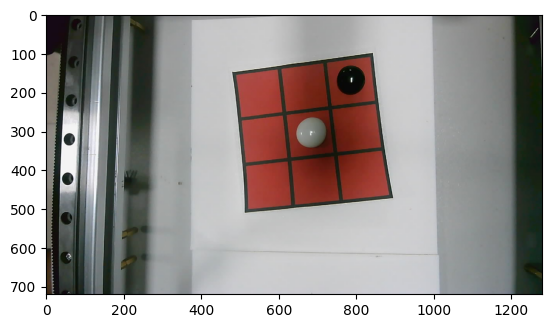

In [997]:
img = cv2.imread("./datasets/IMG_0002.jpg")
img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.show()

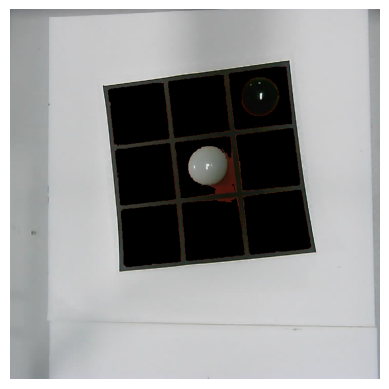

In [998]:
height, width = img.shape[:2]
center_x = width // 2
center_y = height // 2
start_x = center_x - 340
end_x = center_x + 380
start_y = center_y - 360
end_y = center_y + 360
img = img[start_y:end_y, start_x:end_x]
# img[:, ::-1]
# 将图片从 BGR 转换为 HSV 颜色空间
hsv_image = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# 创建红色范围的掩码
red_lower = np.array([0, 80, 80], dtype="uint8")
red_upper = np.array([255, 255, 255], dtype="uint8")
mask = cv2.inRange(hsv_image, red_lower, red_upper)
# 将掩码应用到原始图像
img[mask > 0] = [0, 0, 0]

img2=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img2)
plt.axis("off")
plt.show()

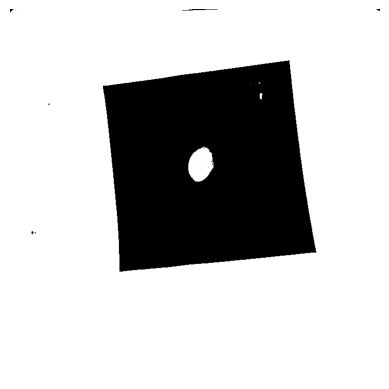

In [999]:
binary = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, binary = cv2.threshold(binary, 120, 255, cv2.THRESH_BINARY)
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.show()

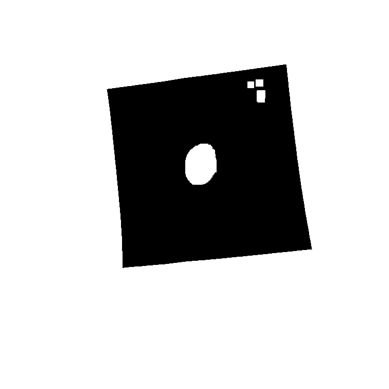

In [1000]:
kernel = np.ones((5, 5), np.uint8)
binary = cv2.dilate(binary, kernel, iterations=3)
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.show()


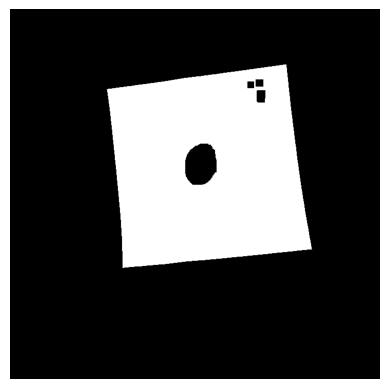

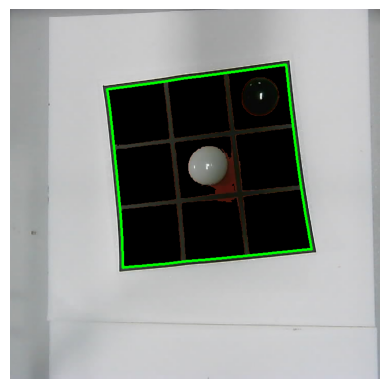

In [1001]:
binary = cv2.bitwise_not(binary)
plt.imshow(binary, cmap='gray')
plt.axis("off")
plt.show()
contours, hierarchy = cv2.findContours(
    binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

max_area = 0
largest_contour = None
for i in range(len(contours)):
    if hierarchy[0][i][0] == -1:
        area = cv2.contourArea(contours[i])
        if area > max_area:
            max_area = area
            largest_contour = contours[i]

cv2.drawContours(img2, [largest_contour], -1, (0, 255, 0), 3)
plt.axis("off")
plt.imshow(img2)
plt.show()

In [1002]:

if len(largest_contour) > 0:
    epsilon = 0.02 * cv2.arcLength(largest_contour, True)
    approx = cv2.approxPolyDP(largest_contour, epsilon, True)
    approx = approx.reshape(-1, 2)

    approx = np.array(
        list(map(lambda p: [p[0] - img.shape[1]/2, p[1] - img.shape[0]/2], approx)))

    approx = farthest_points_in_quadrants(approx)
    if len(list(filter(lambda x: x is not None, approx.values()))) == 4:
        approx = np.array(list(approx.values()))
        approx = np.array(
            list(map(lambda p: [p[0] + img.shape[1]/2, p[1] + img.shape[0]/2], approx)))
        print (int(math.atan((approx[3][1]-approx[0][1]) /
                                (approx[3][0]-approx[0][0]))/math.pi*180))
    else:
        print(0)
else:
    print(0)

-5
